<a href="https://colab.research.google.com/github/almedida/thesis/blob/main/10k_student_ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('pacman')
library(pacman, devtools)
p_load("tidyverse", "matrixTests", "gtools", "VennDiagram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘matrixStats’



matrixTests installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gtools installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’



VennDiagram installed



##**Load Dataset**##

Load 10,000 selected genes with randomly selected samples in each group

In [4]:
tenk_group1_data = read.table("10k_untreated_group12.csv", header= TRUE, sep=",")
tenk_group2_data = read.table("10k_treated_grp22.csv", header= TRUE, sep=",")

In [5]:
head(tenk_group1_data)
head(tenk_group2_data)

,X,GSM1247287,GSM1247409,GSM1247400,GSM1247208
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,5.747143,6.217379,6.817949,6.341990
2,4,10.069770,8.557116,8.963299,9.072234
3,7,6.677855,6.604854,7.245951,6.646721
4,8,7.052094,7.027002,7.299794,6.756484
5,9,6.963023,7.168324,7.352896,6.994607
6,14,5.794534,6.068964,5.657244,6.176538


,X,GSM1247362,GSM1247338,GSM1247219,GSM1247295
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,6.326476,5.778903,6.011732,6.693239
2,4,10.262686,10.541875,10.079571,9.618058
3,7,7.279109,7.170793,7.613719,7.317107
4,8,7.298507,7.137390,7.185195,7.392985
5,9,7.121931,7.076823,7.352460,7.202329
6,14,6.091486,6.058325,6.129704,6.091151


In [6]:
tenk_group1_data = tenk_group1_data[-1]
tenk_group2_data = tenk_group2_data[-1]

In [7]:
head(tenk_group1_data)
head(tenk_group2_data)

,GSM1247287,GSM1247409,GSM1247400,GSM1247208
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.747143,6.217379,6.817949,6.341990
2,10.069770,8.557116,8.963299,9.072234
3,6.677855,6.604854,7.245951,6.646721
4,7.052094,7.027002,7.299794,6.756484
5,6.963023,7.168324,7.352896,6.994607
6,5.794534,6.068964,5.657244,6.176538


,GSM1247362,GSM1247338,GSM1247219,GSM1247295
,<dbl>,<dbl>,<dbl>,<dbl>
1,6.326476,5.778903,6.011732,6.693239
2,10.262686,10.541875,10.079571,9.618058
3,7.279109,7.170793,7.613719,7.317107
4,7.298507,7.137390,7.185195,7.392985
5,7.121931,7.076823,7.352460,7.202329
6,6.091486,6.058325,6.129704,6.091151


##**Extracting p-values using Student's t-test**##

In [8]:
tenk_ttest <- row_t_equalvar(tenk_group1_data, tenk_group2_data, alternative = "two.sided", mu = 0, conf.level = 0.95)

In [9]:
head(tenk_ttest)

,obs.x,obs.y,obs.tot,mean.x,mean.y,mean.diff,var.x,var.y,var.pooled,stderr,df,statistic,pvalue,conf.low,conf.high,alternative,mean.null,conf.level
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,4,4,8,6.281115,6.202587,0.07852775,0.19369496,0.1573405441,0.17551775,0.2962412,6,0.2650804,0.79981930,-0.6463485,0.80340397,two.sided,0,0.95
2,4,4,8,9.165605,10.125548,-0.95994288,0.41247282,0.1505982832,0.28153555,0.3751903,6,-2.5585492,0.04299260,-1.8780005,-0.04188524,two.sided,0,0.95
3,4,4,8,6.793845,7.345182,-0.55133664,0.09173886,0.0358924969,0.06381568,0.1786277,6,-3.0865133,0.02148336,-0.9884228,-0.11425051,two.sided,0,0.95
4,4,4,8,7.033844,7.253519,-0.21967575,0.04934595,0.0132095996,0.03127777,0.1250555,6,-1.7566255,0.12949834,-0.5256756,0.08632412,two.sided,0,0.95
5,4,4,8,7.119713,7.188386,-0.06867325,0.03231354,0.0146590849,0.02348631,0.1083658,6,-0.6337168,0.54964514,-0.3338349,0.19648841,two.sided,0,0.95
6,4,4,8,5.924320,6.092666,-0.16834650,0.05756993,0.0008516018,0.02921077,0.1208527,6,-1.3929887,0.21304556,-0.4640625,0.12736949,two.sided,0,0.95


In [11]:
write.csv(tenk_ttest, "pvalue_10k_sorted_all_2.csv", row.names=FALSE)

In [12]:
pvalue_10k_sorted <- tenk_ttest[13]
head(pvalue_10k_sorted)
write.csv(pvalue_10k_sorted, "pvalue_10k_sim2.csv", row.names=FALSE)



,pvalue
,<dbl>
1,0.79981930
2,0.04299260
3,0.02148336
4,0.12949834
5,0.54964514
6,0.21304556


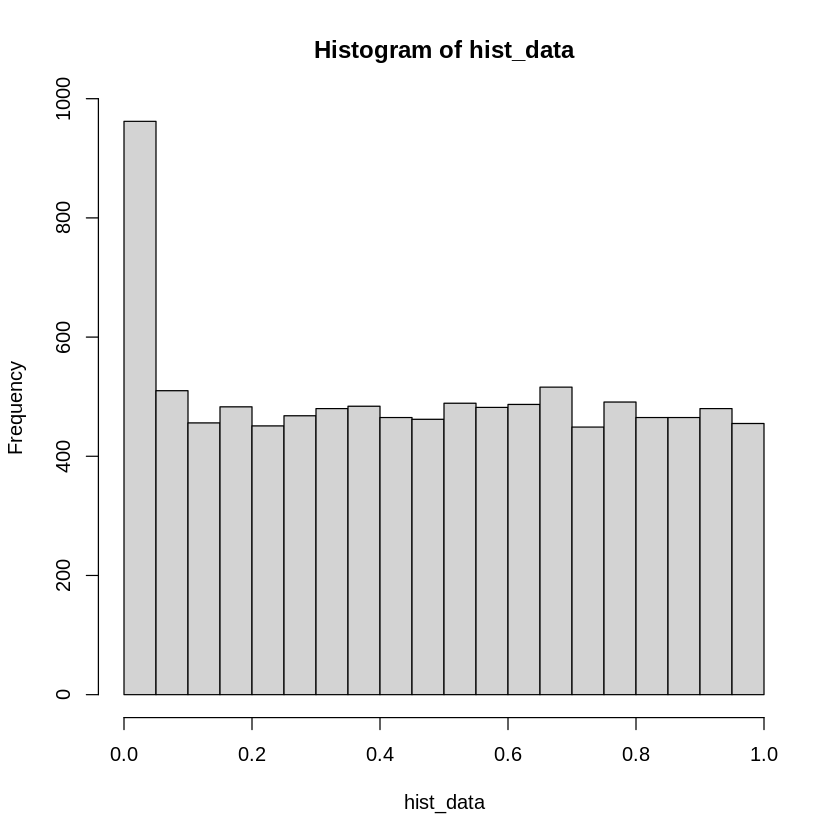

In [13]:
hist_data <- data.matrix(pvalue_10k_sorted)
hist(hist_data)

In [ ]:
hist_limma = read.table("ttest_limma_pvalue_10k_sorted.csv", header= TRUE, sep=",")

head(hist_limma)
hist_data <- data.matrix(pvalue_10k_sorted)

hist(hist_data[, 1])


In [ ]:
hist2 <- hist_limma[, 2]
head(hist2)

**Adjusted p-values using Benjamini Hochberg**

In [15]:
adj_pvalue_10k_sorted <- data.matrix(as.data.frame(as.matrix(pvalue_10k_sorted)), rownames.force = NA)


In [16]:
adj_pvalue_10k_sorted <-p.adjust(adj_pvalue_10k_sorted, "BH")

In [17]:
adj_pvalue_10k_sorted_df = data.frame(adj_pvalue_10k_sorted)
head(adj_pvalue_10k_sorted_df)
write.csv(adj_pvalue_10k_sorted_df, "adj_pvalue_10k_sim2.csv", row.names=FALSE)

,adj_pvalue_10k_sorted
,<dbl>
1,0.9832992
2,0.4832120
3,0.3412713
4,0.7446713
5,0.9623851
6,0.8437448


##**Venn Diagram Analysis using Intersection method**##

In [ ]:
data0_01 = read.table("data0_01.csv", header= TRUE, sep=",")
data0_05 = read.table("data0_05.csv", header= TRUE, sep=",")
data0_1 = read.table("data0_1.csv", header= TRUE, sep=",")

In [ ]:
dataKidney0_01 = sum(data0_01[1])
dataLiver0_01 = sum(data0_01[2])
dataIntersection0_01 = sum(data0_01[3])

dataKidney0_05 = sum(data0_05[1])
dataLiver0_05 = sum(data0_05[2])
dataIntersection0_05 = sum(data0_05[3])

dataKidney0_1 = sum(data0_1[1])
dataLiver0_1 = sum(data0_1[2])
dataIntersection0_1 = sum(data0_1[3])

In [ ]:
c(dataKidney0_01, dataLiver0_01, dataIntersection0_01)


In [ ]:
draw.pairwise.venn(area1=dataKidney0_01, area2=dataLiver0_01,cross.area=dataIntersection0_01,
                   category=c("Kidney","Liver"),fill=c("Red","Yellow"),
                   )

In [ ]:
draw.pairwise.venn(area1=dataKidney0_05, area2=dataLiver0_05,cross.area=dataIntersection0_05,
                   category=c("Kidney","Liver"),fill=c("Red","Yellow"),
                   )

In [ ]:
draw.pairwise.venn(area1=dataKidney0_1, area2=dataLiver0_1,cross.area=dataIntersection0_1,
                   category=c("Kidney","Liver"),fill=c("Red","Yellow"),
                   )